In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


### Leukemia Case Study

https://newonlinecourses.science.psu.edu/stat501/node/374/

To illustrate, consider data published on n = 27 leukemia patients. The data (leukemia_remission.txt) has a response variable of whether leukemia remission occurred (REMISS), which is given by a 1.

In [2]:
ex = pd.read_csv("./data/leukemia_remission.txt", sep='\t')
ex.head()

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
0,1,0.8,0.83,0.66,1.9,1.10,1.00
1,1,0.9,0.36,0.32,1.4,0.74,0.99
2,0,0.8,0.88,0.70,0.8,0.18,0.98
3,0,1.0,0.87,0.87,0.7,1.05,0.99
4,1,0.9,0.75,0.68,1.3,0.52,0.98


In [3]:
features_ = ex.columns.values.tolist()
features_ = [i for i in features_ if i not in ['REMISS']]
features_

['CELL', 'SMEAR', 'INFIL', 'LI', 'BLAST', 'TEMP']

In [4]:
y=ex['REMISS']
X= sm.add_constant(ex[features_])

C:\Users\phhale\AppData\Local\Continuum\anaconda3\envs\bril\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Logistic Regression Model Fitting

In [5]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.399886
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 REMISS   No. Observations:                   27
Model:                          Logit   Df Residuals:                       20
Method:                           MLE   Df Model:                            6
Date:                Wed, 31 Jul 2019   Pseudo R-squ.:                  0.3718
Time:                        16:02:37   Log-Likelihood:                -10.797
converged:                       True   LL-Null:                       -17.186
                                        LLR p-value:                   0.04670
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2581     74.965      0.857      0.391     -82.670     211.187
CELL          30.8301     52

Above are the estimates from the regression coefficent with the p-values based on the __Wald test__:
$\begin{equation*} Z=\frac{\hat{\beta}_{i}}{\textrm{s.e.}(\hat{\beta}_{i})} \end{equation*}$ that indicates the __test of significance for individual coefficient in a logistic regression__. 

The _bone marrow leukemia cells_ `LI` has the __smallest p-value__ and so appears to be the __closest to a significant predictor of remission occuring__. 

After looking at various subsets of the data, we find that a good model is one which only includes the labeling index as a predictor:


In [6]:
y_data =ex['REMISS']
x_data= sm.add_constant(ex['LI'])

model = sm.Logit(y_data, x_data)
model_fit = model.fit()

print(model_fit.summary())

cov = model_fit.cov_params()
std_err = np.sqrt(np.diag(cov))
z_values = model_fit.params / std_err

Optimization terminated successfully.
         Current function value: 0.482833
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 REMISS   No. Observations:                   27
Model:                          Logit   Df Residuals:                       25
Method:                           MLE   Df Model:                            1
Date:                Wed, 31 Jul 2019   Pseudo R-squ.:                  0.2414
Time:                        16:02:37   Log-Likelihood:                -13.036
converged:                       True   LL-Null:                       -17.186
                                        LLR p-value:                  0.003967
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7771      1.379     -2.740      0.006      -6.479      -1.075
LI             2.8973      1.

Regression Equation

P(1)  =  exp(Y')/(1 + exp(Y'))


Y' = -3.78 + 2.90 LI

used seaborn to plot a regression:

C:\Users\phhale\AppData\Local\Continuum\anaconda3\envs\bril\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


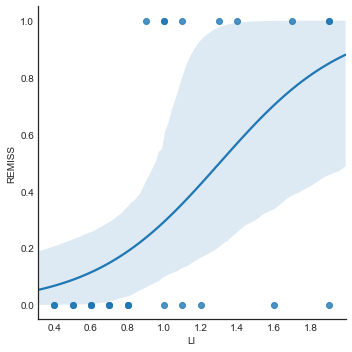

In [7]:
sns.lmplot(x="LI", logistic=True, y="REMISS", data=ex)
plt.show()

#### Odds Ratio
The odds ratio for LI of 18.1245 is calculated as 
exp
(
2.89726
)


In [8]:
np.exp(model_fit.params)

const     0.022888
LI       18.124486
dtype: float64

The odds ratio for LI of 18.1245 is calculated as exp(2.89726).

* At LI=0.9, the estimated odds of leukemia remission is exp{−3.77714+2.89726∗0.9}=0.310.
* At LI=0.8, the estimated odds of leukemia remission is exp{−3.77714+2.89726∗0.8}=0.232.

In [9]:
model_fit.conf_int

<bound method LikelihoodModelResults.conf_int of <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x000001C6259CEE10>>

In [10]:
model2 = smf.ols(formula='REMISS~ LI ', data = ex).fit()
print(sm.stats.anova_lm(model2))

            df    sum_sq   mean_sq          F    PR(>F)
LI         1.0  1.762466  1.762466  10.397945  0.003498
Residual  25.0  4.237534  0.169501        NaN       NaN


## Poisson Sampling

https://newonlinecourses.science.psu.edu/stat504/node/57/

> QUESTION: What is the most likely mean number of goals scored; that is, what is the most likely value of the unknown parameter λ given the data x?

In [11]:
soccer = pd.read_csv("./data/world_cup.txt",sep='\t')
#soccer.Freq = soccer.Freq.astype(int)
soccer.head()

,Goals,Freq
0,0,23
1,1,37
2,2,20
3,3,11
4,4,2


$\begin{align} \bar{x} &= \dfrac{1}{95}\sum\limits_{i=1} x_i\\ &= \dfrac{1}{95} (0\times 23+1\times 37+2\times 20+3\times 11+4\times 2+5\times 1+6\times 0+ 7\times 0+ 8 \times 1)\\ &= \dfrac{131}{95}\\ &= 1.38\\ \end{align}$

__Thus, $\hat{\lambda}=1.38$  goals per first round matches.__

In [12]:
# compute the sample size
n = soccer.Freq.sum()

# compute the same mean
smean = (1/n) * (soccer.Goals * soccer.Freq).sum()
smean

1.3789473684210527

$[1.38-1.96\sqrt{1.38/95},1.38+1.96\sqrt{1.38/95}]=[1.14,1.62]$

and we are 95% confident that the mean number of goals scored by a team during the first round match-ups will be somewhere between 1.14 and 1.62. 


under this Poisson model with $\hat{\lambda}=1.38$ , the expected probability of scoring 2 goals is

In [13]:
## compute the Poisson probability for X=1, P(X=1) 
poisson = stats.distributions.poisson
poisson.pmf(2, smean)

0.23943969582948485

In [14]:
## Poisson probabilities for X=0, 1, ..., 8 with LAMBDA=smean 
## these are estimates of cell probabilities 

pihat = poisson.pmf([0,1,2,2,3,4,5,6,7], smean)

## compute expected frequencies for each cell j, E(Xj)=n pi_j
efreq = n*pihat
soccer['Expected Counts'] = efreq
efreq

array([23.92513364, 32.99150007, 22.7467711 , 22.7467711 , 10.45553338,
        3.60440756,  0.99405766,  0.22845887,  0.04500468])

Here is a summary of these probabilities:

In [15]:
soccer

,Goals,Freq,Expected Counts
0,0,23,23.925134
1,1,37,32.991500
2,2,20,22.746771
3,3,11,22.746771
4,4,2,10.455533
5,5,1,3.604408
6,6,0,0.994058
7,7,0,0.228459
8,8,1,0.045005


## Binomial Likelihood

https://newonlinecourses.science.psu.edu/stat504/node/58/

### PSU  High Risk Drinking Example 

![](https://newonlinecourses.science.psu.edu/stat504/sites/onlinecourses.science.psu.edu.stat504/files/lesson02/high_risk_drinking/index.png)

First define the likehihood function for binomial sample with:
* N = 1315
* X = 630
* p = unknown parameter

>QUESTION: What is the true population proportion of students who are high-risk drinkers at Penn State?

Thus for our example, assuming the Binomial distribution, our "best" guess estimate of the true proportion of students who are high-risk drinkers is

In [16]:
630/1315

0.4790874524714829

Here are also the likelihood and loglikelihood graphs for our example. We can see that the peak of the likelihood is at the proportion value equal to 0.48

In [17]:
dbinom = stats.distributions.binom

def likelhd(p):
    return dbinom(630, 1315, p)

1-proportion Hypothesis test, Approximate 95% confidence interval, and MLE

H0: p=0.5 vs. Ha: p is not equal 0.5 

In [18]:
630/1315

0.4790874524714829

__when the sample size is small, we can do an exact test via:__

In [19]:
sm.stats.binom_test(630, 1315, 0.5)

0.13642445794149205

The statistic z = -1.45 with two sided p-value of 0.136. __Thus we do not have a very strong evidence that the proportion of high-risk drinkers is different from 50%; i.e., do not reject the null hypothesis.__

In [20]:
sm.stats.proportion_confint(630, 1315)

(0.45208675254889413, 0.5060881523940716)

This interval is known as the Wald confidence interval.

For our example, the 95% CI is 0.48 ± 1.96 × 0.014 = (0.453, 0.507). We can be 95% confident that the true population proportion of students high-risk drinkers is between 0.454 and 0.506.

### Lesson 2: One-Way Tables and Goodness-of-Fit Test
https://newonlinecourses.science.psu.edu/stat504/node/61/

In [21]:
x = [3,7,5,10,2,3] 
stats.chisquare(x)

Power_divergenceResult(statistic=9.200000000000001, pvalue=0.1013478563301067)

The p-values are P(χ25 ≥ 9.2) = .10. Given these p-values, __with the critical value or Type I error of α=0.05, we fail to reject the null hypothesis__. ___there is a moderate evidence that the dice is fair.___

 

### Heart Disease Example

Example description: https://newonlinecourses.science.psu.edu/stat504/node/71/#heart

This is an example of a 2 × 4 table. The data below are taken from the Framingham longitudinal study of coronary heart disease (Cornfield, 1962). In this study, n = 1329 patients were classified by serum cholesterol level (mg/100 cc) and whether they had been diagnosed with coronary heart disease (CHD).

https://newonlinecourses.science.psu.edu/stat504/node/85/

In [456]:
heart = pd.DataFrame(columns=['0-199', "200-219", "220-259", "260+"], index=['CHD', 'noCHD'])
heart.loc['CHD'] = [12, 8, 31, 41]
heart.loc['noCHD'] = [307, 246, 439, 245]
heart_t = sm.stats.Table(heart)
print(heart_t.table_orig)

# enter data
#heart = np.array(((12,8,31,41),(307,246,439,245)))
#heart

       0-199  200-219  220-259  260+
CHD       12        8       31    41
noCHD    307      246      439   245


In [457]:
heart_t = sm.stats.Table(heart)
#print(heart_t.table_orig)
rslt = heart_t.test_nominal_association()
print("Chi-Square Statistic: ", rslt.statistic)
print("Chi-Square Probability (p-value): ", rslt.pvalue)

Chi-Square Statistic:  35.02845147656801
Chi-Square Probability (p-value):  1.2015041994661857e-07


In [458]:
chi2, p, dof, ex = stats.chi2_contingency(heart)

print("Pearson's Chi-squared test with Yates' continuity correction")
print("X-squared: ", chi2)
print("p-value  : ", p)
print("degree of f: ", dof)

print("\nObserved: ")
print(heart)

print("\nExpected: ")
print(ex)

Pearson's Chi-squared test with Yates' continuity correction
X-squared:  35.02845147656801
p-value  :  1.2015041992784588e-07
degree of f:  3

Observed: 
       0-199  200-219  220-259  260+
CHD       12        8       31    41
noCHD    307      246      439   245

Expected: 
[[ 22.082769    17.58314522  32.53574116  19.79834462]
 [296.917231   236.41685478 437.46425884 266.20165538]]


In [459]:
chi2, p, dof, ex = stats.chi2_contingency(heart, lambda_="log-likelihood", correction=False)
print("Likelihood ratio test")
print("G2 - Likelihood-ratio stat: ", chi2)
print("p-value  : ", p)
print("degree of f: ", dof)

#print("\nObserved: ")
#print(heart)

#print("\nExpected: ")
#print(ex)

Likelihood ratio test
G2 - Likelihood-ratio stat:  31.921237504606403
p-value  :  5.437359872822451e-07
degree of f:  3


__Conclusion: we rejecect the null hypothesis of independence because of the big values of the chi-square statistics__ Notice the dof are equal to 3 = (4-1)(2-1) thefefore the p-value is low. Therefore, through the X2 test for independence, __we have demonstrated beyond a reasonable doubt that a relationship exists between cholesterol and CHD__


#### Pearson Residuals

__How large is the discrepancy between the two proposed models.__ The residuals provide an indication on where the diffreneces are and potentially which leads to a rejection in the null hyptoehsioes. 

$r_j=\dfrac{X_j-n\hat{\pi}_j}{\sqrt{n\hat{\pi}_j}}=\dfrac{O_j-E_j}{\sqrt{E_j}}$


The __Pearson residual__ compares the observed with the expected counts. The sign (+/-) indicates whether the observed requency in cell _j_ is higher or lower than the value fitted under the model, and the magnitude indicates the degree of departure. 

In [460]:
heart_t.resid_pearson

,0-199,200-219,220-259,260+
CHD,-2.145621,-2.285387,-0.269239,4.764917
noCHD,0.585143,0.623259,0.073425,-1.299464


__Pearson Standardized (adjusted) residuals__

Comparision with normal distribution percentage points also indicates lack of fit. 

$\dfrac{O_{ij}-E_{ij}}{\sqrt{[E_{ij}(1-p_{i+})(1-p_{+j})]}}$


In [461]:
heart_t.standardized_resids

,0-199,200-219,220-259,260+
CHD,-2.551129,-2.633878,-0.347121,5.575108
noCHD,2.551129,2.633878,0.347121,-5.575108


Cell Chi-square

In [462]:
heart_t.chi2_contribs

,0-199,200-219,220-259,260+
CHD,4.603690,5.222995,0.072490,22.704433
noCHD,0.342392,0.388452,0.005391,1.688608


__Conclusion:__ note the values 4.60, 5.22, 22.70. Those are the Perason residuals and much larger than 3.84, and they seem to be driving the lack of independence .

#### Measure of Association 
https://newonlinecourses.science.psu.edu/stat504/node/84/

In the heart example, it is sensible to think of serum cholesterol as an explanatory variable and CHD as a response. Therefore, it would make sense to estimate the conditional probabilities of CHD within the four cholesterol groups.

__Conditional Probability__ looks at these two events in relationship with one another. 

The results is shown below

In [463]:
heart / heart.sum(axis=0)

,0-199,200-219,220-259,260+
CHD,0.037618,0.031496,0.065957,0.143357
noCHD,0.962382,0.968504,0.934043,0.856643


__Interpretation__ the risk of CHD appears to be essentially constant for the groups with cholesterol levels between 0-199 and 200-219. The __estimated probability drops from .038 to .031, this drop is not statistically signficant__ which is confired by estimating delta for the idfference in propotations:

$\hat{\delta}=d=\dfrac{n_{11}}{n_{1+}}-\dfrac{n_{21}}{n_{2+}}=p_{1|1}-p_{1|2}$


,0-199,200-219
CHD,12,8
noCHD,307,246


In [469]:
chi2, p, dof, ex = stats.chi2_contingency(heart[['0-199', "200-219"]], correction=False)

print("Pearson's Chi-squared test with Yates' continuity correction")
print("X-squared: ", chi2)
print("p-value  : ", p)
print("degree of f: ", dof)

Pearson's Chi-squared test with Yates' continuity correction
X-squared:  0.15730352264754285
p-value  :  0.6916513296148726
degree of f:  1


This test yields a chi-square=0.157 with df=1 and p-value=0.69, for the two other groups however, the risk the results are shown below:

In [471]:
chi2, p, dof, ex = stats.chi2_contingency(heart[['220-259', "260+"]], correction=False)

print("Pearson's Chi-squared test with Yates' continuity correction")
print("X-squared: ", chi2)
print("p-value  : ", p)
print("degree of f: ", dof)

Pearson's Chi-squared test with Yates' continuity correction
X-squared:  12.36146641712151
p-value  :  0.00043828630400296573
degree of f:  1


The chi-squared value is much higher with a chi-squ=12.36 and p-value of 0.004

## Smoking Example

In [472]:
smoke = pd.DataFrame(columns=['yes', "no"], index=['both', 'one', 'neither'])
smoke.loc['both'] = [400, 1380]
smoke.loc['one'] = [416, 1823]
smoke.loc['neither'] = [188, 1168]
smoke_t = sm.stats.Table(smoke)
print(smoke_t.table_orig)

         yes    no
both     400  1380
one      416  1823
neither  188  1168


In [473]:
rslt = smoke_t.test_nominal_association()
print("Chi-Square Statistic: ", rslt.statistic)
print("Chi-Square Probability (p-value): ", rslt.pvalue)

Chi-Square Statistic:  37.566341777317575
Chi-Square Probability (p-value):  6.959411713580721e-09


In [490]:
smoke.sum(axis=1)

both       1780
one        2239
neither    1356
dtype: int64

In [488]:
smoke_t.marginal_probabilities

(both       0.331163
 one        0.416558
 neither    0.252279
 dtype: float64, yes    0.186791
 no     0.813209
 dtype: float64)

__The etimates of these probabilities are:__

Yes is the response and `Both, One, Neither` are the predictors. 

In [509]:
est_prob = smoke.values[:,0] / smoke.sum(axis=1)
est_prob

both       0.224719
one        0.185797
neither    0.138643
dtype: float64

You can then compare these as risks associated with the parameters. The effect of Y on Z can be summarized with two differences.m, For example, we can calculate the increase in the probability of Z = 1 as Y goes from 3 to 2, and as Y goes from 2 to 1:

In [515]:
print("prob:`one` - prob:`neither`: ", est_prob[1] - est_prob[2])
print("prob:`both` - prob:`one`: ", est_prob[0] - est_prob[1])

prob:`one` - prob:`neither`:  0.04715416306004708
prob:`both` - prob:`one`:  0.03892187021694074


In [531]:
print("Effect prob one vs neither: ", (smoke.values[1,0]*smoke.values[2,1]) / (smoke.values[2,0]*smoke.values[1,1]))


Effect prob one vs neither:  1.4177238827744774


This estimated value of 1.42 means that __students with one smoking parent are estimated to be 42% more likely (one the odds scale) to smoke than students whos parents do not smoke__

In [532]:
print("Effect prob both vs neither: ", (smoke.values[0,0]*smoke.values[2,1]) / (smoke.values[2,0]*smoke.values[0,1]))

Effect prob both vs neither:  1.8008017267961764


The value 1.80 means that __studens with 2 smoking parents are 80% more likely to smoke than students whos parents do not smoke__

In [546]:
smoke.loc['1-2 parents smoke'] = smoke.values[:2].sum(axis=0)
smoke[2:]

,yes,no
neither,188,1168
1-2 parents smoke,816,3203


In [553]:
chi2, p, dof, ex = stats.chi2_contingency(smoke[2:], correction=False)

print("Pearson's Chi-squared test with Yates' continuity correction")
print("X-squared: ", chi2)
print("p-value  : ", p)
print("degree of f: ", dof)

oddsratio, pvalue = stats.fisher_exact(smoke[2:], alternative='two-sided')
print("Odds Ratio: ", 1/oddsratio)

Pearson's Chi-squared test with Yates' continuity correction
X-squared:  27.67657823706137
p-value  :  1.433883449213492e-07
degree of f:  1
Odds Ratio:  1.582771470894972


This table has X2 = 27.7, G2 = 29.1, p-value ≈ 0, and $\hat\theta=1.58$. Therefore, __we estimate that a student is 58% more likely, on the odds scale, to smoke if he or she has at least one smoking parent__

Now we ask, _"Amon those students with at least one smoking parent,_ is there any difference between those with one smoking parent and those with 2 smoking parents, _Given that at least one parent smokes_, is there any evidence that the other parent's smoking affects the chances that the student will smoke?

In [557]:
chi2, p, dof, ex = stats.chi2_contingency(smoke[:2], correction=False)

print("Pearson's Chi-squared test with Yates' continuity correction")
print("X-squared: ", chi2)
print("p-value  : ", p)
print("degree of f: ", dof)

oddsratio, pvalue = stats.fisher_exact(smoke[:2], alternative='two-sided')
print("Odds Ratio: ", oddsratio)

Pearson's Chi-squared test with Yates' continuity correction
X-squared:  9.283941709771309
p-value  :  0.0023117143947693234
degree of f:  1
Odds Ratio:  1.27020624303233


__Conclusion__: with $\chi^2=9.3$, pvalue ~ 0.002 and $\hat\theta=1.27$, given that at least one parent smokes, the fact that the other parent smokes __does indeed raise the student's probability of smoking; the effect, however is not large $\hat\theta=1.27$__ and tht was in going from neither parent smoking to at least one parent smoking $\hat\theta=1.58$. 